<a href="https://colab.research.google.com/github/Dinesh-kumar-M-2002/Gold-price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [35]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding the corelation:(2types)
1.Positive correlation
2.Negative correlation

In [11]:
corelation=gold_data.corr()

In [12]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


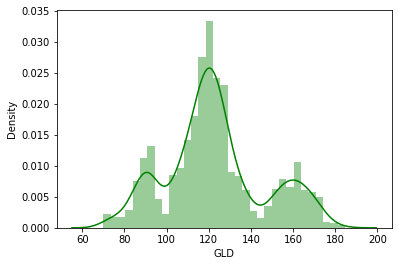

In [17]:
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target 

In [18]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data 

In [23]:
X_train, X_text, Y_train, Y_text = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training using Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [27]:
test_data_prediction = regressor.predict(X_text)

In [28]:
print(test_data_prediction)

[168.42829871  81.7358     116.28569991 127.68080073 120.61000139
 154.52489834 150.28129875 126.1913005  117.42529895 126.02190093
 116.91350126 172.34000107 142.17599874 167.55489863 115.13900003
 117.54080047 139.64400283 169.8849004  159.00220357 156.60279974
 155.05109994 125.22009995 176.44980052 157.3505034  125.16020031
  93.85479982  77.11900036 120.89960015 119.00109895 167.64539988
  88.40479996 125.08729989  91.24100103 117.61630016 121.03899931
 135.91960154 115.51990118 115.11430081 146.65059921 106.94110107
 104.28880236  87.36039782 126.44700041 118.06009989 153.88579926
 119.59550037 108.38149964 108.01749834  93.03280038 127.16289779
  74.6082006  113.56449938 121.44789987 111.13249953 118.85839902
 120.33849955 159.31000025 166.72980146 147.01579678  85.93949883
  94.33890045  86.83639908  90.59230012 118.94800027 126.51570063
 127.61700025 170.36810033 122.30059952 117.30489873  98.64660021
 168.21710129 142.78449787 131.58570244 121.01640229 120.93049947
 119.75410

In [29]:
error_Score = metrics.r2_score(Y_text,test_data_prediction)
print("R squared error: ",error_Score)

R squared error:  0.9890049831123889


Comparing the actual and predicted values in a plot

In [33]:
Y_text=list(Y_text)

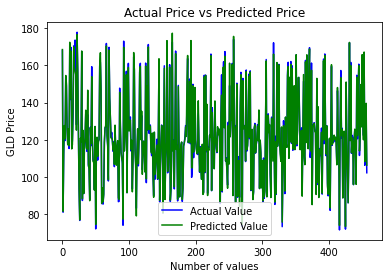

In [34]:
plt.plot(Y_text,color="blue",label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()